In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [47]:
wallstreetbets = pd.read_csv('./wallstreetbets_trimmed.csv')
investing = pd.read_csv('./investing_trimmed.csv')

In [48]:
wallstreetbets.head()

,selftext,title,id,subreddit
0,"Estimated $CMG earnings, while historically pr...",Chipotle earnings?,jc17j1,wallstreetbets
1,It seems like most of the posts here are about...,Does anyone do the 'buy and hold' strategy?,jc164y,wallstreetbets
2,Oldschool runescape markets could be our next ...,Colab between most autistic sub and most autis...,jc1225,wallstreetbets
3,"Enjoy!\n\n&amp;#x200B;\n\nHello S3CR3TB1TCH,\n...",PSA: Robinhood is increasing margin reqs. Your...,jc11mg,wallstreetbets
4,"So NY is a for convenience state and city, but...",How bad is it gonna be when for example NYC go...,jc1061,wallstreetbets


In [49]:
wallstreetbets.shape

(10047, 4)

In [50]:
investing.head()

,selftext,title,id,subreddit
0,\n\nI have read all the knowledge available o...,Diversification is so important that i can't s...,jc0qo4,investing
1,example of what a formula is\n\nE= energy\n\nc...,"ok sierus question, what is the literal mathem...",jbzkt4,investing
2,#1 Gold Current Price = $2000 Investment retur...,Investing in precious metals table,jbz6cw,investing
3,Where could one find (preferably free) data su...,Where do you get data for backtesting?,jbz6aj,investing
4,With asset management companies all having sli...,How to value asset management companies,jbz1u4,investing


In [51]:
investing.shape

(10040, 4)

In [54]:
df = wallstreetbets.append(investing).reset_index()

In [56]:
df['sub_target'] = np.where(df['subreddit'] == 'wallstreetbets', 1, 0)

In [57]:
df.shape

(20087, 7)

In [58]:
df.drop_duplicates(subset=['selftext'], inplace=True)

In [59]:
df.isnull().sum()

level_0       0
index         0
selftext      1
title         0
id            0
subreddit     0
sub_target    0
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.shape

(19202, 7)

In [62]:
df['combined'] = (df['title'] + ' ' + df['selftext'])

In [63]:
df.head()

,level_0,index,selftext,title,id,subreddit,sub_target,combined
0,0,0,"Estimated $CMG earnings, while historically pr...",Chipotle earnings?,jc17j1,wallstreetbets,1,"Chipotle earnings? Estimated $CMG earnings, wh..."
1,1,1,It seems like most of the posts here are about...,Does anyone do the 'buy and hold' strategy?,jc164y,wallstreetbets,1,Does anyone do the 'buy and hold' strategy? It...
2,2,2,Oldschool runescape markets could be our next ...,Colab between most autistic sub and most autis...,jc1225,wallstreetbets,1,Colab between most autistic sub and most autis...
3,3,3,"Enjoy!\n\n&amp;#x200B;\n\nHello S3CR3TB1TCH,\n...",PSA: Robinhood is increasing margin reqs. Your...,jc11mg,wallstreetbets,1,PSA: Robinhood is increasing margin reqs. Your...
4,4,4,"So NY is a for convenience state and city, but...",How bad is it gonna be when for example NYC go...,jc1061,wallstreetbets,1,How bad is it gonna be when for example NYC go...


In [64]:
df['char_count'] = df['combined'].str.len()
df['word_count'] = df['combined'].str.count(' ') + 1

In [43]:
df.to_csv('./joined_wsb_investing.csv')

In [65]:
df['sub_target'].value_counts(normalize=True)

1    0.505937
0    0.494063
Name: sub_target, dtype: float64

In [19]:
df['char_count'].describe()

count    19202.000000
mean       862.159567
std       1466.720360
min         33.000000
25%        349.000000
50%        510.000000
75%        853.000000
max      39979.000000
Name: char_count, dtype: float64

In [20]:
df['word_count'].describe()

count    19202.000000
mean       141.539267
std        220.290793
min          2.000000
25%         60.000000
50%         88.000000
75%        144.000000
max       5955.000000
Name: word_count, dtype: float64

In [21]:
df.head()

,index,selftext,title,id,subreddit,sub_target,combined,char_count,word_count
0,0,"Estimated $CMG earnings, while historically pr...",Chipotle earnings?,jc17j1,wallstreetbets,1,"Chipotle earnings? Estimated $CMG earnings, wh...",938,154
1,1,It seems like most of the posts here are about...,Does anyone do the 'buy and hold' strategy?,jc164y,wallstreetbets,1,Does anyone do the 'buy and hold' strategy? It...,356,60
2,2,Oldschool runescape markets could be our next ...,Colab between most autistic sub and most autis...,jc1225,wallstreetbets,1,Colab between most autistic sub and most autis...,347,60
3,3,"Enjoy!\n\n&amp;#x200B;\n\nHello S3CR3TB1TCH,\n...",PSA: Robinhood is increasing margin reqs. Your...,jc11mg,wallstreetbets,1,PSA: Robinhood is increasing margin reqs. Your...,2143,250
4,4,"So NY is a for convenience state and city, but...",How bad is it gonna be when for example NYC go...,jc1061,wallstreetbets,1,How bad is it gonna be when for example NYC go...,584,109


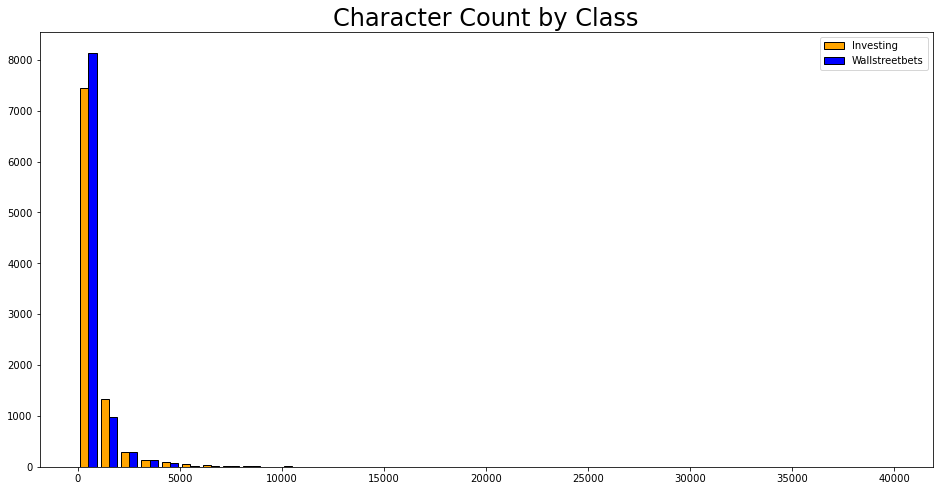

In [22]:
plt.figure(figsize=(16,8))
plt.hist([df[df['sub_target']==0]['char_count'], 
          df[df['sub_target']==1]['char_count']],
         bins=40, color=['orange', 'blue'], ec='k')
plt.title('Character Count by Class', fontsize=24)
plt.legend(['Investing', 'Wallstreetbets']);

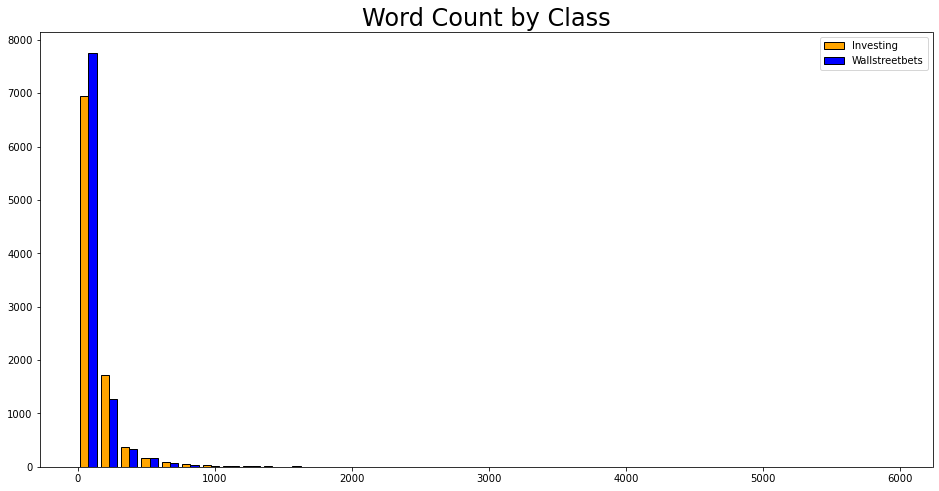

In [23]:
plt.figure(figsize=(16,8))
plt.hist([df[df['sub_target']==0]['word_count'], 
          df[df['sub_target']==1]['word_count']],
         bins=40, color=['orange', 'blue'], ec='k')
plt.title('Word Count by Class', fontsize=24)
plt.legend(['Investing', 'Wallstreetbets']);

In [24]:
X = df['combined']
y = df['sub_target']

In [25]:
y.value_counts(normalize=True)

1    0.505937
0    0.494063
Name: sub_target, dtype: float64

In [26]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)

In [27]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [28]:
# Fit/transform the vectorizer on our corpus.
X_train = cvec.fit_transform(X_train)

In [29]:
X_validation = cvec.transform(X_validation)

In [30]:
X_train.shape

(14401, 53783)

In [31]:
type(X_train)

scipy.sparse.csr.csr_matrix

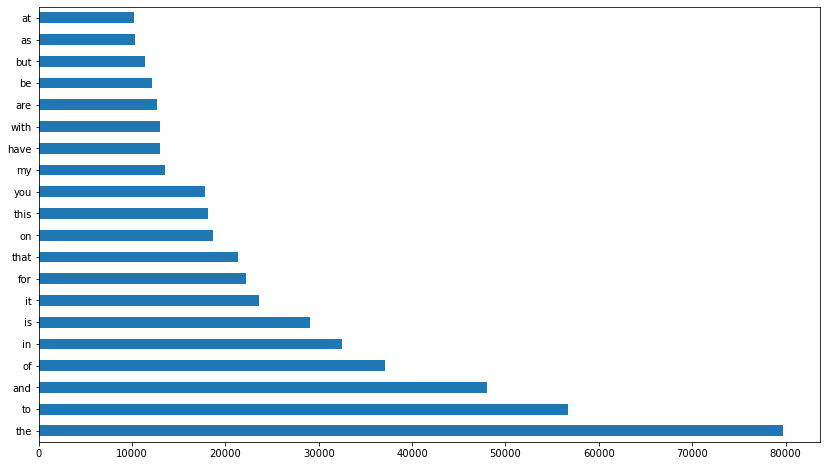

In [33]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening
X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())

# Plot top occuring words
plt.figure(figsize=(14, 8))
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');